# A Gentle Introduction to t-SNE
  
  
In the realm of practical data science, visualizing high dimensional data has been a daunting quest due to our physical limits as human. 

[Herbert A. Simon](https://en.wikipedia.org/wiki/Herbert_A._Simon), the winner of the Nobel Prize in Economics in 1978 and the Turing Award in 1975, mentioned that "A wealth of information creates a poverty of attention and a need to allocate that attention efficiently among the overabundance of information sources that might consume it." The abundance of information does not necessarily make us more knowledgable.[(1)](#Reference:)

<img src="mnist_pca.png">
Figure 1. [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) plot of all data points from MNIST with the first two principal components as axes.
Each color represents a different hand-written digit.
Code can be accessed [here](https://gist.github.com/mrgloom/6622175)

The figure above is a plot of [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of 70,000 labeled hand-written digits using the established dimension reduction technique, principal component analysis (PCA). The high dimensional features are hard to visualize in 2-D, and the digits with different labels are tangled. The relationship between the various features and the labels is not clearly represented in this case.

## t-SNE as a Solution
[t-Distributed Stochastic Neighbor Embedding (t-SNE)](https://lvdmaaten.github.io/publications/misc/Supplement_JMLR_2008.pdf) is a relatively new approach for dimension reduction and, therefore, visualizing high dimensional data. Since it was published in 2008, t-SNE has been gained its popularity as a tool for clustering datasets with a large range of features. Nowadays, it is often favored over its more well known competitors such as the PCA. Then, [the Barnes-Hut tree implementation](https://lvdmaaten.github.io/publications/misc/Supplement_JMLR_2014.pdf) allowed larger datasets to make use of t-SNE, and making the algorithm more applicable and versatile to the real world of Big Data.

## The Algorithm

The algorithm behind t-SNE is rather intuitive.
First, in a high dimensional set of $N$ data points, the conditional probability of a data point $x_{i}$ would choose $x_{j}$ as its neighbor is given by:

$$p_{j\mid i}={\frac {\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{j}\rVert ^{2}/2\sigma _{i}^{2})}{\sum _{k\neq i}\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{k}\rVert ^{2}/2\sigma _{i}^{2})}}$$

Here, $\sigma_{i}$ is the bandwidth of the Gaussian kernels. The bandwidth is adaptively related to the density of the data. In regions where the data points are sparsely distributed, $\sigma_{i}$ takes on smaller values, and vice versa.

The probability of $x_{i}$ and $x_{j}$ being neighbors is given by:
$$p_{ij}={\frac {p_{j\mid i}+p_{i\mid j}}{2N}}$$

The problem t-SNE aims to solve is to learn a $d$ dimensional map $y_{i}$ where $i \in (1, N)$ such that $p_{ij}$ is clearly represented. Similar to the formula above, the similarity $q_{ij}$ between two points in the map $y_{i}$ and $y_{j}$ is calculated by:
$$q_{ij}={\frac {(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{j}\rVert ^{2})^{-1}}{\sum _{k\neq i}(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{k}\rVert ^{2})^{-1}}}$$

Then a t-distribution where the tail is not exponentially bounded is introduced to measure dissimilar points and making them far apart.

Finally, the Kullback-Leibler divergence (KL divergence) is used for deciding the coordinates of the points $y_{i}$, such that the KL divergence of distribution $P$ and distribution $Q$ are minimized.
$$KL(P || Q)=\sum _{i\neq j}p_{ij}\log {\frac {p_{ij}}{q_{ij}}}$$


## Implementaion and Usage

There have been a huge range of t-SNE [implementions](https://lvdmaaten.github.io/tsne/) in languages ranging from Matlab to C++. The original algorithm that t-SNE used had its time complexity of $O(n^{2})$ through a direct-sum over $n$ bodies. The most up-to-date and efficient implementation of t-SNE constructs a quadtree with $O(n)$ nodes and a total runtime of $O(nlogn)$.

It could be lengthy and computationaly inefficient to implement t-SNE yourself. Here we are going to utilize the digit dataset and t-SNE implementation provided by the scikit-learn (sklearn) library for both simplicity and efficiency.

We will use 500 labeled hand-written digits from the sklearn libray to start with.

In [27]:
# Load a fraction of the digits dataset which is similar to MNIST
import sklearn
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data[:500]
labels = digits.target[:500]
train_length = len(features)

print("{} data points are loaded".format(train_length))

500 data points are loaded


Now, Let's investigate the data.

In [28]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's stack the images with distinct labels respectively. 

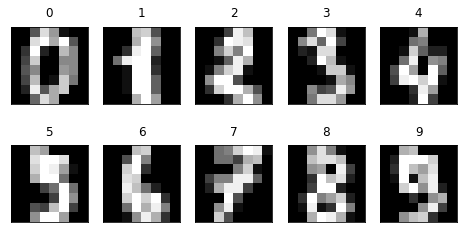

In [29]:
from matplotlib import pyplot as plt

rows = 2
cols = 5

plt.figure(figsize=(8,4))
plt.gray()

total = rows * cols
for i in range(total):
    
    ax = plt.subplot(rows, cols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
    
plt.show()

From the gray scale images, the patterns of the hand-written digits are clear. However, without reducing the dimension of the feature space, we would not be able to visualize all 64 attributes in 2-D.plt.show()

We now proceed onto fitting the 64 dimensional features into t-SNE.

t-SNE took 2.6137421131134033s


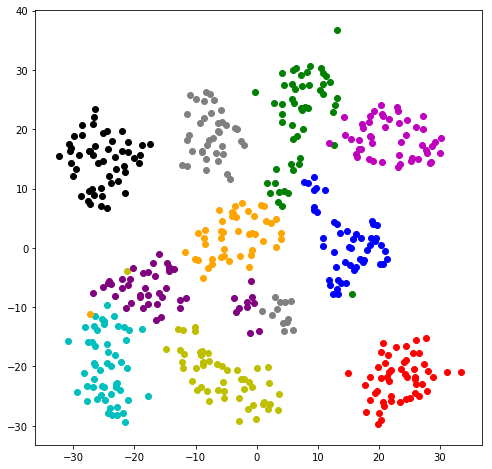

In [30]:
# Import t-SNE from sklearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

import time
start = time.time()
# Fit the features into t-SNE
X = tsne.fit_transform(features)
print("t-SNE took {}s".format(time.time() - start))

# Visualize the 500 data points
label_ids = range(train_length)

colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'

plt.figure(figsize=(8,8))

for i, c, label in zip(label_ids, colors, digits.target_names):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=c, label=label)

plt.show()

The digits seem to be clearly seperated in the 2-D plot. However, the runtime of t-SNE on large dataset is still considerably long. Does t-SNE's performance worth the time investment?

Let's apply what we just mastered on 2000 data points from the actual MNIST set and compare to the one generated by PCA.

In [31]:
# Load MNIST from sklearn
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

mnist = fetch_mldata("MNIST original")
print(mnist['DESCR'])

features = mnist.data[:70000] / 255.
labels = mnist.target[:70000]

# Shuffle the data so that we have a pseudo uniform distribution of digits
features, labels = shuffle(features, labels)
features, labels = features[:2000], labels[:2000]

train_length = len(features)
num_features = len(features[0])

print("{} data points are loaded".format(train_length))
print("Each instance has {} features".format(num_features))

mldata.org dataset: mnist-original
2000 data points are loaded
Each instance has 784 features


The MNIST dataset has far more instances than the previous digit dataset, and each instance has a daunting number of 784 features. Would t-SNE represent the 784 dimensional features clearly in a 2-D plot?

Start Embedding
t-SNE took 25.145044088363647s


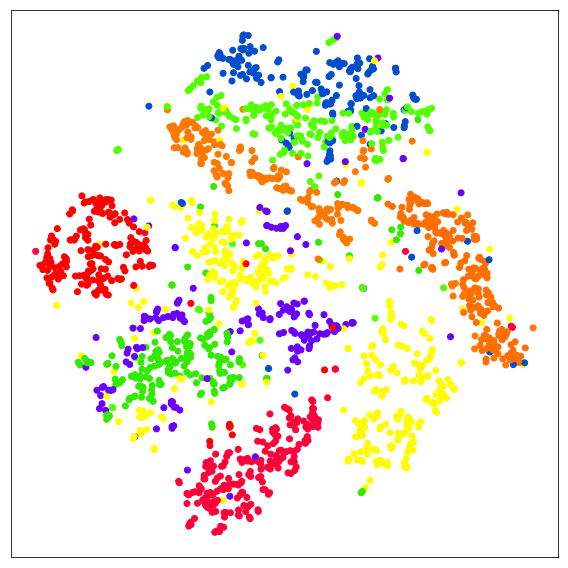

In [32]:
# Visualize the 2000 MNIST data points
import time
SEED = 1234
tsne = TSNE(n_components=2, random_state=SEED)

# Fit the features into t-SNE
start = time.time()

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE took {}s".format(time.time() - start))

# Visualize all data points

fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

As shown in the plot, it seems that t-SNE has done a great job. We will generate a plot from the same dataset using PCA and compare the runtime as well as the performance.

Start Embedding
PCA took 0.07857418060302734s


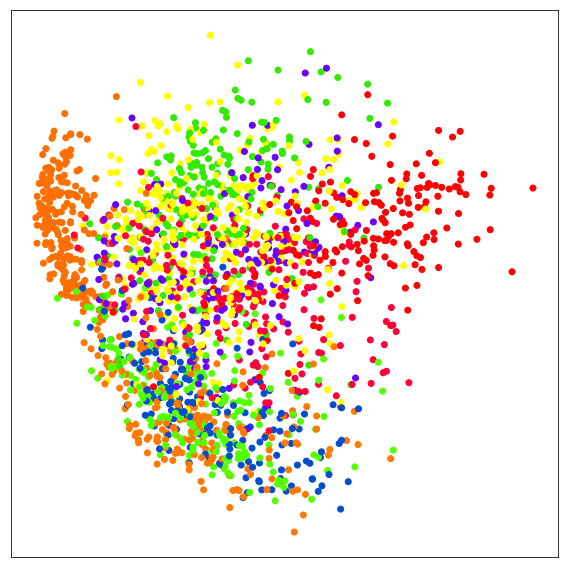

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='randomized')

start = time.time()

print("Start Embedding")
X = pca.fit_transform(features)
print("PCA took {}s".format(time.time() - start))

# Visualize all data points

fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

As we can see, the sklearn t-SNE implementation has a considerably longer runtime, but exceptional performance in grouping the hand-written digits into meaningful clusters from the MNIST dataset comparing to PCA. 

#### Why is t-SNE superior than PCA for visualizing high dimensional data?

From [Visualizing Data Using t-SNE](https://www.youtube.com/watch?v=RJVL80Gg3lA), PCA mainly consideres large pairwise distances in the map, which is the straight dotted line in the figure below. However, t-SNE also concerns the non-linearity, which is the spiral solid line that actually makes more sense for the set of data.


<img src="tsne_pca.png"> 
Figure 2. Illustration of differential emphasis of PCA and t-SNE [(2)](#Reference:)



## Tuning the hyperparameters

In actual practice, tunning the hyperparameters of t-SNE would be very helpful in sorting the clusters. The [sklearn source code](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/t_sne.py#L442) of t-SNE explains the how the hyperparameters affect the learning of t-SNE.

Among the tuneable parameters, the perplexity is the attention the model will pay to local aspects and to the global aspects of the dataset, and the particular parameter has complex effects on the performance of t-SNE.

We shall see how perplexity affect the performance of t-SNE in the following steps.

Start Embedding
t-SNE with low perplexity took 14.014644861221313s


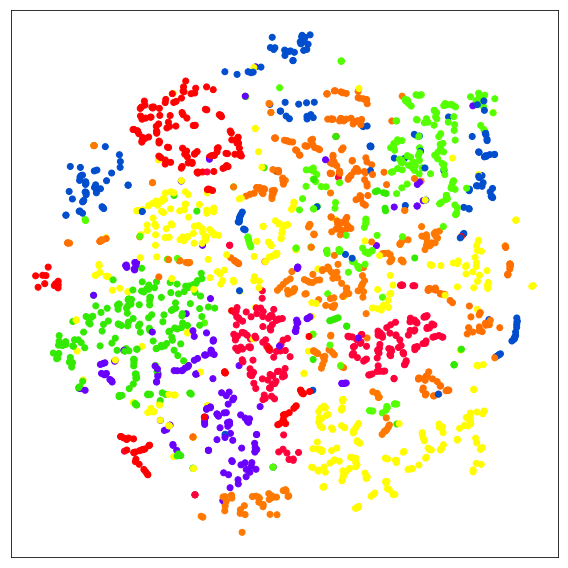

In [34]:
start = time.time()

# Decrease the default perplexity of 30 to 5
tsne = TSNE(n_components=2, random_state=SEED, perplexity=5.0)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with low perplexity took {}s".format(time.time() - start))

# Visualize all data points
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

Start Embedding
t-SNE with high perplexity took 45.601300954818726s


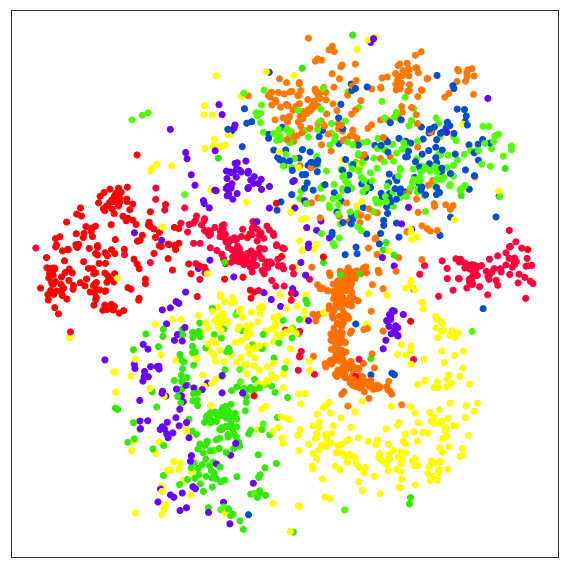

In [35]:
start = time.time()

# Decrease the default perplexity of 30 to 500

tsne = TSNE(n_components=2, random_state=SEED, perplexity=500.0)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with high perplexity took {}s".format(time.time() - start))

# Visualize all data points

fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

As shown above, t-SNE with low perplexity is trained in a shorter period of time, but does not necessarily produce a meaningful scatting plot. The plot generated by t-SNE with high perplexity has some dense clusters while the others are dispersed. We shall proceed onto another dataset provided by sklearn to investigate the effects on the plot by tuning the perplexity.

The iris dataset consists 150 samples from three related iris species with  each individual's length and width of the sepals and petals as the features. It is a far more sparse dataset than the MNIST set.

mldata.org dataset: iris
150 data points are loaded
Each instance has 4 features
------------------------------------------------------------------------------------------
Start Embedding
t-SNE with perplexity 50 took 0.5875368118286133s


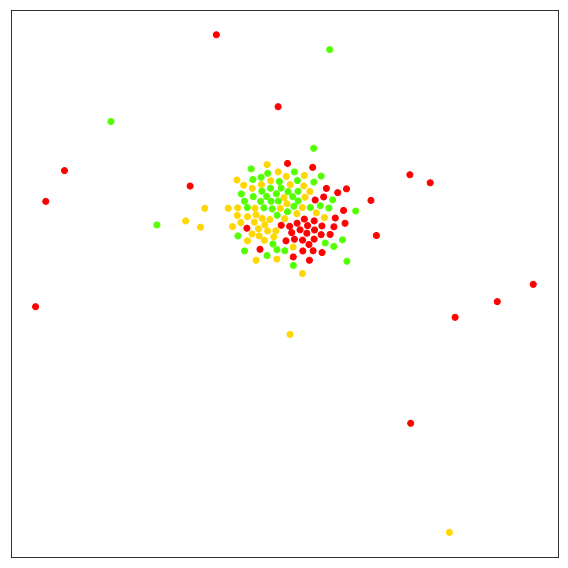

In [36]:
# Import iris dataset from sklearn
iris = fetch_mldata("iris")
print(iris['DESCR'])

features = iris.data
labels = iris.target

train_length = len(features)
num_features = len(features[0])

print("{} data points are loaded".format(train_length))
print("Each instance has {} features".format(num_features))

start = time.time()

# Perplexity at 10
tsne = TSNE(n_components=2, random_state=SEED, perplexity=50.0)

print("-" * 90)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with perplexity 50 took {}s".format(time.time() - start))

# Visualize all data points
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

Start Embedding
t-SNE with perplexity 5 took 0.5460348129272461s


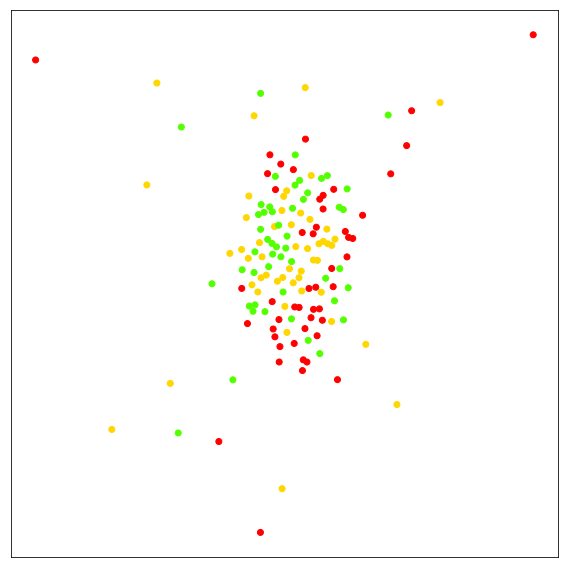

In [37]:
start = time.time()

# Decrease the perplexity to 5
tsne = TSNE(n_components=2, random_state=SEED, perplexity=5.0)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with perplexity 5 took {}s".format(time.time() - start))

# Visualize all data points
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

Start Embedding
t-SNE with perplexity 20 took 1.2279348373413086s


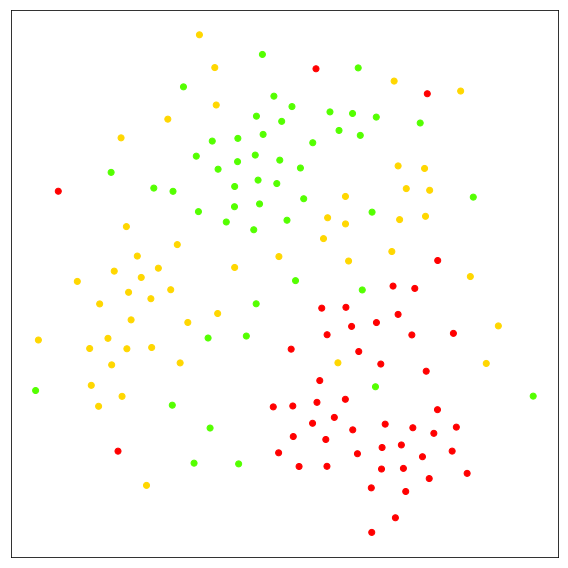

In [38]:
start = time.time()

tsne = TSNE(n_components=2, random_state=SEED, perplexity=20.0)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with perplexity 20 took {}s".format(time.time() - start))

# Visualize all data points
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

Note that, the initial state of t-SNE could be randomly picked. Each run of t-SNE would generate a different plot even with the same number of iterations.

Start Embedding
t-SNE with perplexity 20 took 1.2026300430297852s


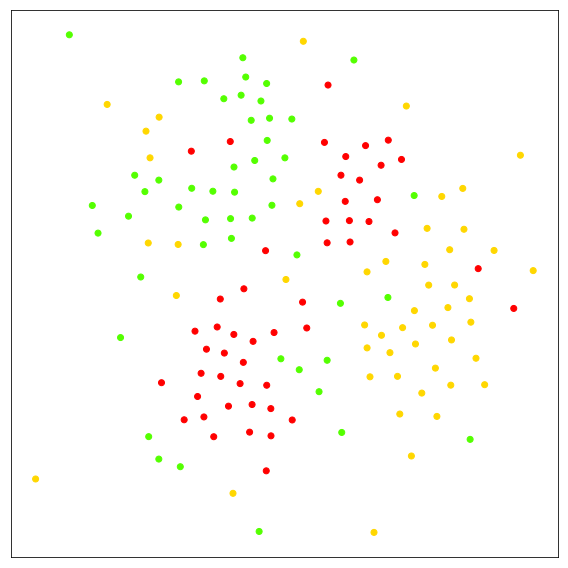

In [39]:
start = time.time()

SEED = 4321

tsne = TSNE(n_components=2, random_state=SEED, perplexity=20.0)

print("Start Embedding")
X = tsne.fit_transform(features)
print("t-SNE with perplexity 20 took {}s".format(time.time() - start))

# Visualize all data points
fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

Maybe you have noticed that t-SNE even with fine tuning did not do a great job on representing the iris data. Actually, our old friend PCA could be a better technique. This is due to the relatively fewer number of attributes for the iris data comparing the digits data. In practice, we should always consider the nature of the dataset while choosing the method for representation. 

Start Embedding
PCA took 0.006473064422607422s


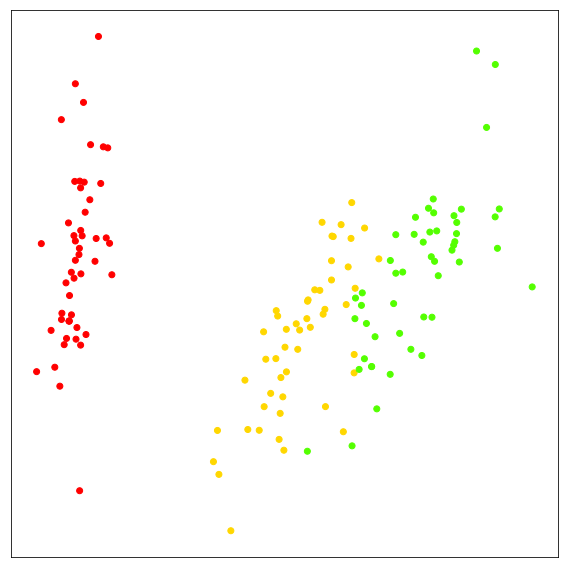

In [40]:
pca = PCA(n_components=2, svd_solver='randomized')

start = time.time()

print("Start Embedding")
X = pca.fit_transform(features)
print("PCA took {}s".format(time.time() - start))

# Visualize all data points

fig, plot = plt.subplots()
fig.set_size_inches(8, 8)
plt.prism()
plot.scatter(X[:, 0], X[:, 1], c=labels)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

The article [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/) would be an insightful reading for us to understand the relationship between the hyperparameters and the clusters formed. In a nutshell, the shape of the clusters and the distance between clusters are not clear representations of how similar or how different the data points. To infer a meaningful topology of a dataset, we may need to generate several plots using different parameters.

## Reference:
1. Simon, H. A. (1971) "Designing Organizations for an Information-Rich World" in: Martin Greenberger, Computers, Communication, and the Public Interest, Baltimore. MD: The Johns Hopkins Press. pp. 40–41

2. Laurens van der Maaten. (2013) "Visualizing Data Using t-SNE". Obtained from: https://www.youtube.com/watch?v=RJVL80Gg3lA
    

